In [1]:
# ECON 662D1 Midterm - Jean-Sébastien Matte 260913682

In [2]:
# Import modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Import data
in_dir = '/Users/jsmatte/github/ECON662D1/Midterm'
in_file = str(in_dir + '/e662.midterm.20.dat.txt')

data = pd.read_csv(in_file, sep = ' ', header = None)
data = data.drop(columns = [1, 2, 3])
data.columns = ['Ct', 'Yt']
print(data)

          Ct       Yt
0     554046   612996
1     547349   623964
2     547376   629424
3     545467   636492
4     534089   638328
..       ...      ...
108  1118489  1761120
109  1132225  1784600
110  1143236  1807972
111  1152568  1831992
112  1155482  1848904

[113 rows x 2 columns]


In [4]:
# Add ct and yt to dataset
data['ct'] = np.log(data.Ct)
data['yt'] = np.log(data.Yt)
print(data)

          Ct       Yt         ct         yt
0     554046   612996  13.225003  13.326114
1     547349   623964  13.212842  13.343848
2     547376   629424  13.212891  13.352560
3     545467   636492  13.209398  13.363727
4     534089   638328  13.188318  13.366608
..       ...      ...        ...        ...
108  1118489  1761120  13.927489  14.381461
109  1132225  1784600  13.939695  14.394705
110  1143236  1807972  13.949373  14.407716
111  1152568  1831992  13.957503  14.420914
112  1155482  1848904  13.960028  14.430104

[113 rows x 4 columns]


In [5]:
# Model (2)

# create data for \Delta ct and \Delta yt
Dct_array = []
for i in range(1, len(data.ct.values)):
    temp_Dct = data.ct.values[i] - data.ct.values[i - 1]
    Dct_array.append(temp_Dct)
Dct = np.array([[i] for i in Dct_array])
print('Dct.shape ->', Dct.shape)

Dyt_array = []
for i in range(1, len(data.yt.values)):
    temp_Dyt = data.yt.values[i] - data.yt.values[i - 1]
    Dyt_array.append(temp_Dyt)
Dyt = np.array([[i] for i in Dyt_array])
print('Dyt.shape ->', Dyt.shape)

# create matrix X of the regressors
X2 = np.zeros((112,4))
for i in range(X2.shape[0]):
    X2[i] = [1, data.ct.values[i], Dyt_array[i], data.yt.values[i]]
    
# Regression Model
model2 = sm.OLS(Dct, X2).fit()
print(model2.summary())

Dct.shape -> (112, 1)
Dyt.shape -> (112, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.614
Date:                Wed, 21 Oct 2020   Prob (F-statistic):            0.00446
Time:                        22:16:55   Log-Likelihood:                 423.57
No. Observations:                 112   AIC:                            -839.1
Df Residuals:                     108   BIC:                            -828.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [6]:
# Extract model parameters and define parameters for (1)
params = model2.params
alpha = params[0]
beta = params[1] + 1
gamma0 = params[2]
gamma1 = params[3] - params[2]
print(alpha, beta, gamma0, gamma1)

cov = np.sqrt(model2.scale)
print(cov)


0.21622606362067193 0.9364768899336617 0.3503113044205379 -0.30351571627817325
0.005613301235072004


In [7]:
# Simulation of model (1)
iterates = 113
ct1 = [data.ct.values[0]]
disturbances = []
for t in range(1, iterates):
    u = np.random.normal(0, cov)
    temp_ct = alpha + (beta * ct1[t - 1]) + (gamma0 * data.yt.values[t]) + (gamma1 * data.yt.values[t - 1]) + u
    ct1.append(temp_ct)
    disturbances.append(u)
print(len(ct1))

113


0.07166862402048402 -0.0645633773203027
-0.008546226466507451


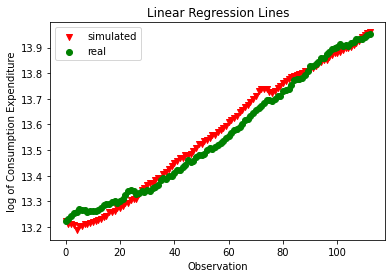

In [8]:
# results from simulation -> ct1
# real data -> data.ct.values
diff = []
for i in range(len(data.ct.values)):
    diff.append(ct1[i] - data.ct.values[i])
print(max(diff), min(diff))
print(np.mean(diff))

%matplotlib inline
NN = [i for i in range(len(data.ct.values))]
plt.scatter(NN, data.ct.values, c = 'red', marker = 'v', label = 'simulated')
plt.scatter(NN, ct1, c = 'green', marker = 'o', label = 'real')
plt.xlabel('Observation')
plt.ylabel('log of Consumption Expenditure')
plt.title('Linear Regression Lines')
plt.legend(loc = 'upper left')

In [9]:
check = np.array([[ct1[i], data.ct.values[i], diff[i]] for i in range(len(ct1))])
print(check)

[[ 1.32250030e+01  1.32250030e+01  0.00000000e+00]
 [ 1.32312376e+01  1.32128419e+01  1.83957430e-02]
 [ 1.32429655e+01  1.32128912e+01  3.00743186e-02]
 [ 1.32549682e+01  1.32093976e+01  4.55705916e-02]
 [ 1.32599864e+01  1.31883178e+01  7.16686240e-02]
 [ 1.32692005e+01  1.32049327e+01  6.42677428e-02]
 [ 1.32646632e+01  1.32040466e+01  6.06166432e-02]
 [ 1.32674173e+01  1.32096670e+01  5.77502941e-02]
 [ 1.32599288e+01  1.32096414e+01  5.02873840e-02]
 [ 1.32631257e+01  1.32135286e+01  4.95970879e-02]
 [ 1.32606093e+01  1.32188020e+01  4.18073063e-02]
 [ 1.32623672e+01  1.32224223e+01  3.99449230e-02]
 [ 1.32657568e+01  1.32278093e+01  3.79475155e-02]
 [ 1.32745522e+01  1.32316213e+01  4.29308937e-02]
 [ 1.32842850e+01  1.32384276e+01  4.58573700e-02]
 [ 1.32908417e+01  1.32412516e+01  4.95901531e-02]
 [ 1.32912462e+01  1.32581941e+01  3.30520835e-02]
 [ 1.32970369e+01  1.32596666e+01  3.73702455e-02]
 [ 1.32993352e+01  1.32640053e+01  3.53298793e-02]
 [ 1.32935795e+01  1.32755513e+

In [10]:
# Model (1) from simulated data

# The regressands are 
c_ts = ct1[1:]

# create matrix X of the regressors
y_t = data.yt.values[1:]
print('y_t.shape ->', y_t.shape)

X1s = np.zeros((112,4))
for i in range(X1s.shape[0]):
    X1s[i] = [1, ct1[i], y_t[i], data.yt.values[i]]
    
# Regression Model
model1s = sm.OLS(c_ts, X1s).fit()
print(model1s.summary())

y_t.shape -> (112,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.978e+04
Date:                Wed, 21 Oct 2020   Prob (F-statistic):          1.03e-173
Time:                        22:16:56   Log-Likelihood:                 420.91
No. Observations:                 112   AIC:                            -833.8
Df Residuals:                     108   BIC:                            -823.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2561      0.099

In [11]:
# Model (1)

c_t = data.ct.values[1:]
print('c_t.shape ->', c_t.shape)

# create matrix X of the regressors
X1 = np.zeros((112,4))
for i in range(X1.shape[0]):
    X1[i] = [1, data.ct.values[i], y_t[i], data.yt.values[i]]
    
# Regression Model
model1 = sm.OLS(c_t, X1).fit()
print(model1.summary())

c_t.shape -> (112,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.866e+04
Date:                Wed, 21 Oct 2020   Prob (F-statistic):          5.86e-177
Time:                        22:16:56   Log-Likelihood:                 423.57
No. Observations:                 112   AIC:                            -839.1
Df Residuals:                     108   BIC:                            -828.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.158

In [12]:
# Residuals
pred_1 = model1.fittedvalues
pred_1s = model1s.fittedvalues
print(len(pred_1))
print(len(pred_1s))

# Residuals of running (1) on simulated data
resid_s = []
for i in range(len(c_ts)):
    resid_s.append(c_ts[i] - pred_1s[i])
print(len(resid_s))

# Residuals of running (1) on real data
resid = []
for i in range(len(c_t)):
    resid.append(c_t[i] - pred_1[i])
print(len(resid))

N = [i for i in range(len(c_t))]

112
112
112
112


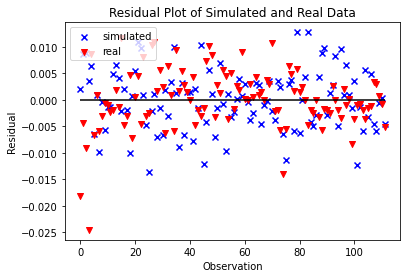

In [13]:
# Plot the residuals
%matplotlib inline
plt.scatter(N, resid_s, c = 'blue', marker = 'x', label = 'simulated')
plt.scatter(N, resid, c = 'red', marker = 'v', label = 'real')
plt.hlines(0, N[0], N[-1])
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('Residual Plot of Simulated and Real Data')
plt.legend(loc = 'upper left')

In [14]:
# Now, for model (1) (to verify answers for the first part)
# create matrix X of the regressors
c_t = data.ct.values[1:]
print('c_t.shape ->', c_t.shape)

y_t = data.yt.values[1:]
print('y_t.shape ->', y_t.shape)

X11 = np.zeros((112,4))
for i in range(X11.shape[0]):
    X11[i] = [1, data.ct.values[i], y_t[i], data.yt.values[i]]

c_t.shape -> (112,)
y_t.shape -> (112,)


In [15]:
# Create regression model for (1)
model11 = sm.OLS(c_t, X11).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.866e+04
Date:                Wed, 21 Oct 2020   Prob (F-statistic):          5.86e-177
Time:                        22:16:57   Log-Likelihood:                 423.57
No. Observations:                 112   AIC:                            -839.1
Df Residuals:                     108   BIC:                            -828.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.158      1.369      0.1

In [16]:
# residuals 
predictions11 = model11.fittedvalues

resid11 = []
for i in range(len(c_t)):
    resid11.append(c_t[i] - predictions11[i])
    
N11 = [i for i in range(len(c_t))]

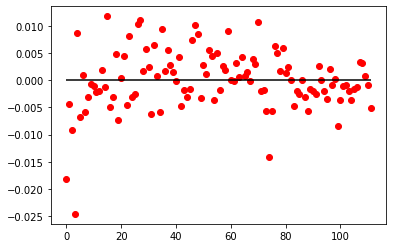

In [17]:
# Plot the residuals
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# plt.scatter(N, residuals1, c = 'blue', marker = 'x', label = 'simulated')
plt.scatter(N11, resid11, c = 'red', marker = 'o', label = 'real')
plt.hlines(0, N[0], N[-1])

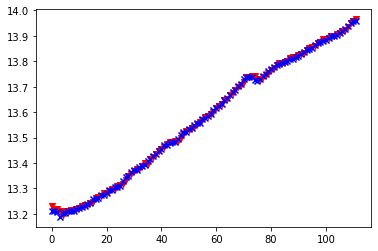

In [18]:
%matplotlib inline
plt.scatter(N, predictions11, c = 'red', marker = 'v', label = 'real')
plt.scatter(N, c_t, c = 'blue', marker = 'x', label = 'real')